In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [36]:
training_df = pd.read_csv(os.path.join('datalake/datasets', 'train_state_CA.csv'))
training_df.head(3)

,Month-Year,Part Number,State,Units sold per Part
0,2014-04-01,DS1010,CA,2.0
1,2014-05-01,DS1010,CA,1.0
2,2014-06-01,DS1010,CA,3.0


In [37]:
df = training_df[training_df['Part Number']=='DS1017T']
df

,Month-Year,Part Number,State,Units sold per Part
94,2014-04-01,DS1017T,CA,12.0
95,2014-05-01,DS1017T,CA,14.0
96,2014-06-01,DS1017T,CA,10.0
97,2014-07-01,DS1017T,CA,14.0
98,2014-08-01,DS1017T,CA,12.0
99,2014-09-01,DS1017T,CA,9.0
100,2014-10-01,DS1017T,CA,9.0
101,2014-11-01,DS1017T,CA,10.0
102,2014-12-01,DS1017T,CA,7.0
103,2015-01-01,DS1017T,CA,6.0


In [38]:
len_train = len(df['Units sold per Part'])-12

train = df[:len_train]
test = df[len_train:]

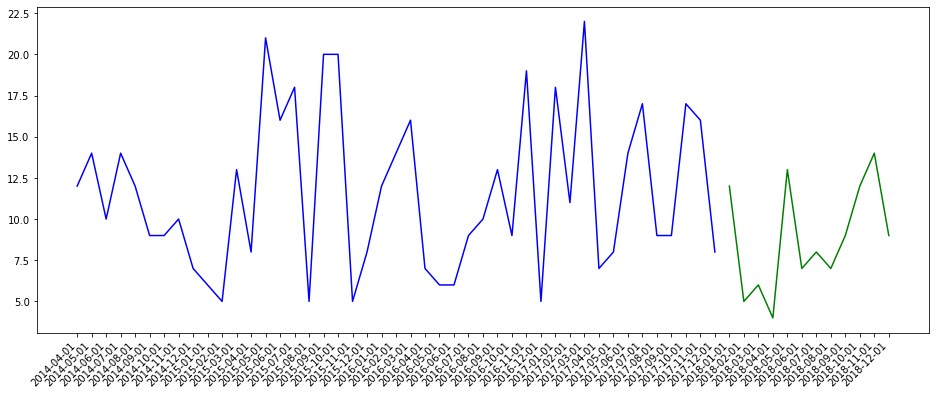

In [39]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45, ha="right")
plt.plot(train['Month-Year'], train['Units sold per Part'],color='blue')
plt.plot(test['Month-Year'], test['Units sold per Part'],color='green')

In [40]:
model = pm.auto_arima(train['Units sold per Part'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=301.307, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=288.432, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=299.314, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=287.789, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=277.953, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=279.851, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=275.954, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=285.789, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=277.851, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 2.276 seconds
                               SARIMAX Results     

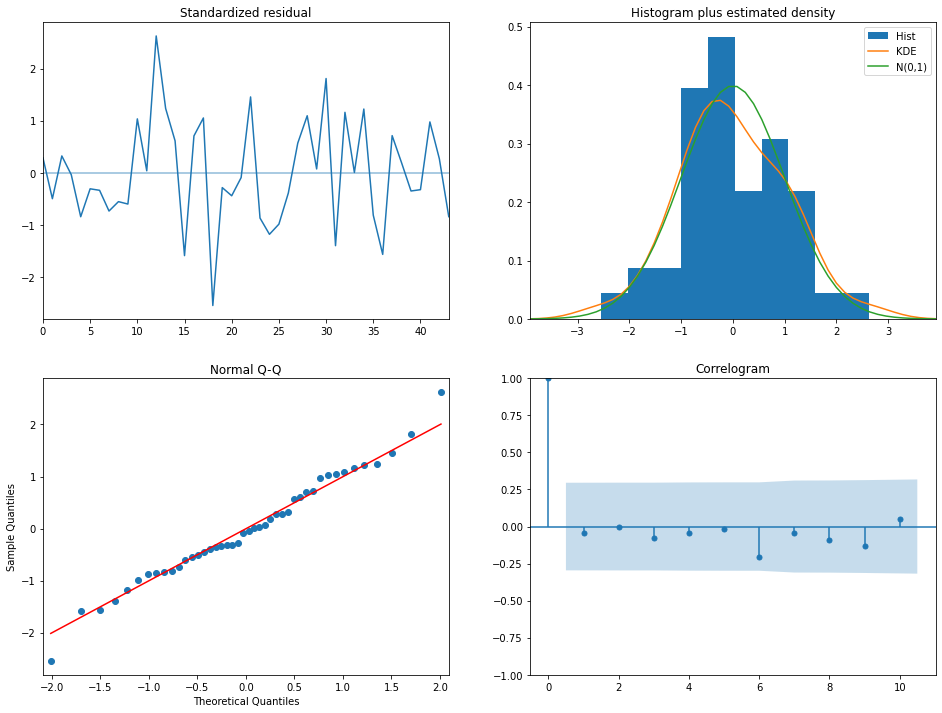

In [41]:
model.plot_diagnostics(figsize=(16,12))
plt.show()

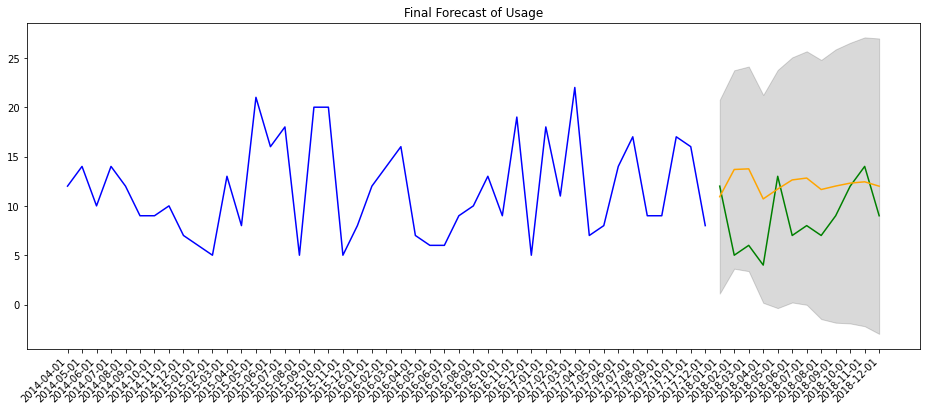

In [42]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train['Units sold per Part']), len(train['Units sold per Part'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(16,6))
plt.xticks(rotation=45, ha="right")
plt.plot(train['Month-Year'],train['Units sold per Part'],color='blue')
plt.plot(test['Month-Year'],test['Units sold per Part'],color='green')
plt.plot(fc_series, color='orange')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()